* Dataset Site: https://data.cityofnewyork.us/City-Government/Film-Permits/tg4x-b46p
* API Documentation: https://dev.socrata.com/foundry/data.cityofnewyork.us/tg4x-b46p
* Data Documentation: https://www.nyc.gov/site/mome/permits/when-permit-required.page

In [31]:
#!pip install sodapy

In [32]:
#Code taken from API Documentation
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("tg4x-b46p", limit=40000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [33]:
results_df.head()

,eventid,eventtype,startdatetime,enddatetime,enteredon,eventagency,parkingheld,borough,communityboard_s,policeprecinct_s,category,subcategoryname,country,zipcode_s
0,670312,Shooting Permit,2022-08-30T13:00:00.000,2022-08-30T23:30:00.000,2022-08-29T11:51:10.000,"Mayor's Office of Film, Theatre & Broadcasting",WEST 45 STREET between 9 AVENUE and 8 AVENUE...,Manhattan,4,"10, 14, 18",Television,Episodic series,United States of America,10036
1,670122,Shooting Permit,2022-08-30T06:00:00.000,2022-08-30T22:00:00.000,2022-08-26T15:38:52.000,"Mayor's Office of Film, Theatre & Broadcasting",NORMAN AVENUE between JEWEL STREET and HUMBOLD...,Brooklyn,1,94,Commercial,Commercial,United States of America,11222
2,670067,Shooting Permit,2022-08-30T07:00:00.000,2022-08-30T12:00:00.000,2022-08-26T13:10:40.000,"Mayor's Office of Film, Theatre & Broadcasting",GREENPOINT AVENUE between NEWEL STREET and PRO...,Brooklyn,1,94,Television,Episodic series,United States of America,11222
3,669996,Shooting Permit,2022-08-30T06:00:00.000,2022-08-30T22:00:00.000,2022-08-26T11:01:45.000,"Mayor's Office of Film, Theatre & Broadcasting",31 STREET between 47 AVENUE and 48 AVENUE,Queens,2,108,Television,Episodic series,United States of America,11101
4,669990,Shooting Permit,2022-08-30T08:00:00.000,2022-08-30T23:30:00.000,2022-08-26T10:43:16.000,"Mayor's Office of Film, Theatre & Broadcasting",COMMERCIAL STREET between BOX STREET and MANHA...,Brooklyn,1,94,Television,Episodic series,United States of America,11222


In [34]:
results_df.isnull().sum()

eventid             0
eventtype           0
startdatetime       0
enddatetime         0
enteredon           0
eventagency         0
parkingheld         0
borough             0
communityboard_s    0
policeprecinct_s    0
category            0
subcategoryname     0
country             0
zipcode_s           0
dtype: int64

In [35]:
results_df.eventtype.unique()

array(['Shooting Permit', 'DCAS Prep/Shoot/Wrap Permit',
       'Theater Load in and Load Outs', 'Rigging Permit'], dtype=object)

In [36]:
results_df.describe()

,eventid,eventtype,startdatetime,enddatetime,enteredon,eventagency,parkingheld,borough,communityboard_s,policeprecinct_s,category,subcategoryname,country,zipcode_s
count,11074,11074,11074,11074,11074,11074,11074,11074,11074,11074,11074,11074,11074,11074
unique,11074,4,4325,5242,10923,1,6637,5,341,770,9,27,3,1364
top,560275,Shooting Permit,2021-11-18T07:00:00.000,2021-07-27T22:00:00.000,2021-10-08T13:24:11.000,"Mayor's Office of Film, Theatre & Broadcasting",EAST 11 STREET between 3 AVENUE and 4 AVENUE...,Manhattan,1,94,Television,Episodic series,United States of America,11222
freq,1,9883,16,12,5,11074,177,4538,2983,1703,7078,4954,11059,1576


In [37]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11074 entries, 0 to 11073
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   eventid           11074 non-null  object
 1   eventtype         11074 non-null  object
 2   startdatetime     11074 non-null  object
 3   enddatetime       11074 non-null  object
 4   enteredon         11074 non-null  object
 5   eventagency       11074 non-null  object
 6   parkingheld       11074 non-null  object
 7   borough           11074 non-null  object
 8   communityboard_s  11074 non-null  object
 9   policeprecinct_s  11074 non-null  object
 10  category          11074 non-null  object
 11  subcategoryname   11074 non-null  object
 12  country           11074 non-null  object
 13  zipcode_s         11074 non-null  object
dtypes: object(14)
memory usage: 1.2+ MB


In [38]:
import datetime
from datetime import datetime

In [39]:
results_df['enddatetime']=pd.to_datetime(
                                  results_df['enddatetime'],
                                 format='%Y/%m/%d %H:%M:%S')

In [40]:
results_df['startdatetime']=pd.to_datetime(
                                  results_df['startdatetime'],
                                 format='%Y/%m/%d %H:%M:%S')

In [41]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11074 entries, 0 to 11073
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   eventid           11074 non-null  object        
 1   eventtype         11074 non-null  object        
 2   startdatetime     11074 non-null  datetime64[ns]
 3   enddatetime       11074 non-null  datetime64[ns]
 4   enteredon         11074 non-null  object        
 5   eventagency       11074 non-null  object        
 6   parkingheld       11074 non-null  object        
 7   borough           11074 non-null  object        
 8   communityboard_s  11074 non-null  object        
 9   policeprecinct_s  11074 non-null  object        
 10  category          11074 non-null  object        
 11  subcategoryname   11074 non-null  object        
 12  country           11074 non-null  object        
 13  zipcode_s         11074 non-null  object        
dtypes: datetime64[ns](2), 

In [42]:
results_df['end_year'] = results_df['enddatetime'].dt.year

In [43]:
results_df['end_year'].unique()

array([2022, 2021])

In [44]:
results_df['start_year'] = results_df['startdatetime'].dt.year

In [45]:
results_df['start_year'].unique()

array([2022, 2021])

In [46]:
import numpy as np

In [47]:
results_df['difference_day'] = pd.DataFrame((results_df['enddatetime']-results_df['startdatetime']).values/np.timedelta64(1,'D'), columns=['difference_day']).round(2)

In [48]:
results_df.head()

,eventid,eventtype,startdatetime,enddatetime,enteredon,eventagency,parkingheld,borough,communityboard_s,policeprecinct_s,category,subcategoryname,country,zipcode_s,end_year,start_year,difference_day
0,670312,Shooting Permit,2022-08-30 13:00:00,2022-08-30 23:30:00,2022-08-29T11:51:10.000,"Mayor's Office of Film, Theatre & Broadcasting",WEST 45 STREET between 9 AVENUE and 8 AVENUE...,Manhattan,4,"10, 14, 18",Television,Episodic series,United States of America,10036,2022,2022,0.44
1,670122,Shooting Permit,2022-08-30 06:00:00,2022-08-30 22:00:00,2022-08-26T15:38:52.000,"Mayor's Office of Film, Theatre & Broadcasting",NORMAN AVENUE between JEWEL STREET and HUMBOLD...,Brooklyn,1,94,Commercial,Commercial,United States of America,11222,2022,2022,0.67
2,670067,Shooting Permit,2022-08-30 07:00:00,2022-08-30 12:00:00,2022-08-26T13:10:40.000,"Mayor's Office of Film, Theatre & Broadcasting",GREENPOINT AVENUE between NEWEL STREET and PRO...,Brooklyn,1,94,Television,Episodic series,United States of America,11222,2022,2022,0.21
3,669996,Shooting Permit,2022-08-30 06:00:00,2022-08-30 22:00:00,2022-08-26T11:01:45.000,"Mayor's Office of Film, Theatre & Broadcasting",31 STREET between 47 AVENUE and 48 AVENUE,Queens,2,108,Television,Episodic series,United States of America,11101,2022,2022,0.67
4,669990,Shooting Permit,2022-08-30 08:00:00,2022-08-30 23:30:00,2022-08-26T10:43:16.000,"Mayor's Office of Film, Theatre & Broadcasting",COMMERCIAL STREET between BOX STREET and MANHA...,Brooklyn,1,94,Television,Episodic series,United States of America,11222,2022,2022,0.65


In [49]:
results_df['category'].value_counts()

Television           7078
Film                 1131
Theater              1041
Commercial            783
Still Photography     491
WEB                   417
Documentary            67
Student                37
Music Video            29
Name: category, dtype: int64

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

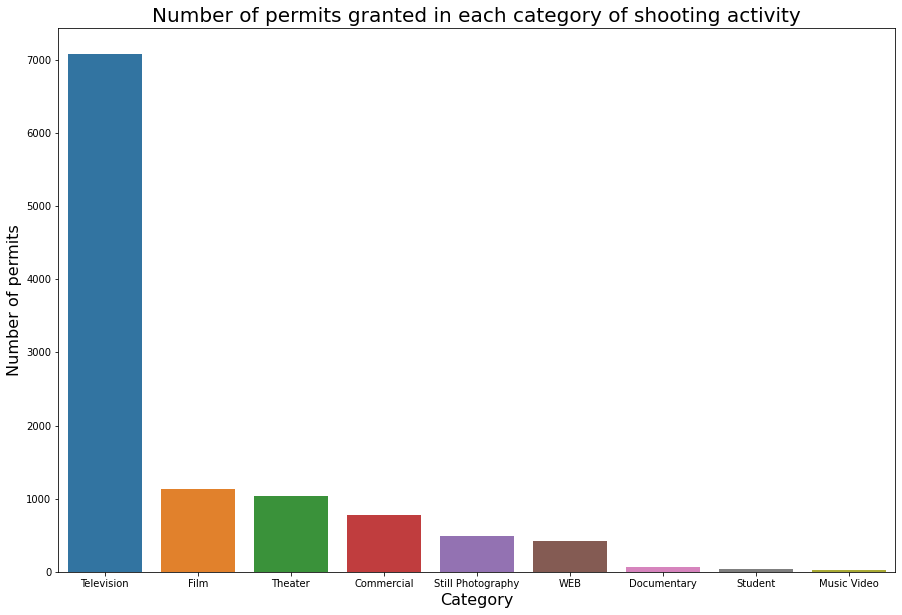

In [52]:
plt.figure(figsize=(15,10))
sns.countplot(x='category',data=results_df,order=results_df['category'].value_counts().index)
plt.title("Number of permits granted in each category of shooting activity",fontsize=20)
plt.xlabel("Category",fontsize=16)
plt.ylabel("Number of permits",fontsize=16)
plt.show()

In [19]:
results_df['eventtype'].value_counts()

Shooting Permit                  9862
Theater Load in and Load Outs    1009
Rigging Permit                    117
DCAS Prep/Shoot/Wrap Permit        64
Name: eventtype, dtype: int64

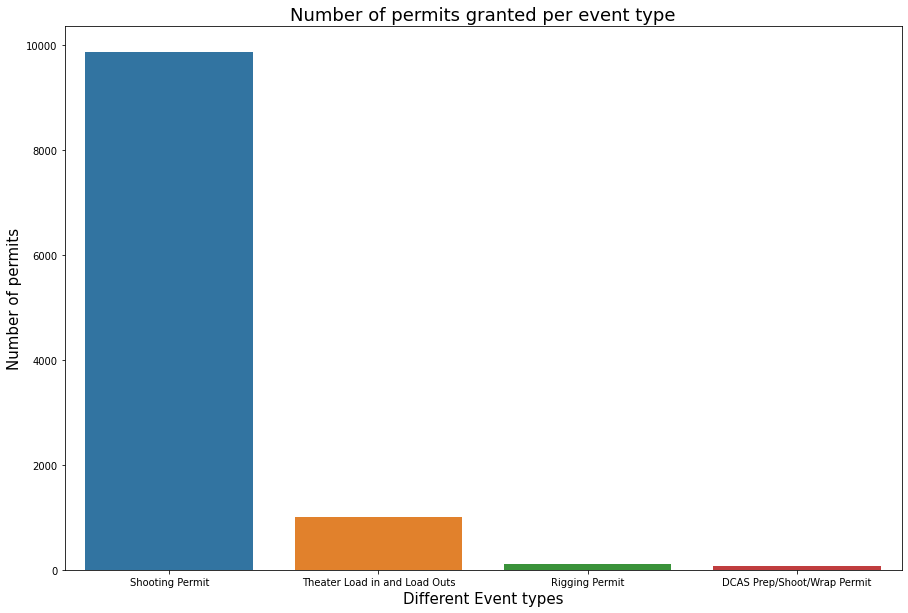

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(x='eventtype',data=results_df,order=results_df['eventtype'].value_counts().index)
plt.title("Number of permits granted per event type",fontsize=18)
plt.xlabel("Different Event types",fontsize=15)
plt.ylabel("Number of permits",fontsize=15)
plt.show()

In [50]:
results_df['borough'].value_counts()

Manhattan        4538
Brooklyn         3972
Queens           2010
Bronx             458
Staten Island      96
Name: borough, dtype: int64

In [53]:
results_df['country'].value_counts()

United States of America    11059
United Kingdom                 11
Canada                          4
Name: country, dtype: int64

In [30]:
print("Data index for missing ZipCode(s)",list(results_df[results_df['zipcode_s'].isnull()].index))

Data index for missing ZipCode(s) []


In [23]:
#!pip install geopandas

In [24]:
#!pip install --upgrade pip setuptools wheel

In [25]:
#conda install -c conda-forge cartopy

In [28]:
#!pip install geoplot

In [27]:
# import geopandas
# import geoplot
# import pandas as pd
# from shapely.geometry import Point, Polygon

In [ ]:
#cols_to_keep=['store_longitude','store_latitude']

# crs={'init':'epsg:4326'}

# boroughs = geopandas.read_file(geoplot.datasets.get_path('nyc_boroughs'))

# geo_df=geopandas.GeoDataFrame(store_locDF,crs=crs,geometry=geopandas.points_from_xy(store_locDF["store_longitude"], store_locDF["store_latitude"]))



# fig,ax=plt.subplots(figsize=(15,15))
# boroughs.plot(ax=ax,alpha=0.4,color="grey")
# geo_df[geo_df['active_yn']=="Y"].plot(ax=ax,markersize=200, alpha=0.4,color="green", label="Active Store")
# geo_df[geo_df['active_yn']=="N"].plot(ax=ax,markersize=200, alpha=0.4,color="red", label="Inactive Stores")
# plt.legend()